In [ ]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 87.7 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055377 sha256=b9a064f52043c6b7028551ab5387d17de42b4b3b2411f71e46402d3f75c28cf5
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
print(insightface.__version__)
print(np.__version__)

0.7.3
1.26.4


# 1. Detect Face(s)

In [ ]:
app = FaceAnalysis(name='buffalo_s')
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_s


100%|██████████| 124617/124617 [00:01<00:00, 64130.95KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_s/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_s/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_s/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_s/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_s/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


## Read the image you're going to swap into

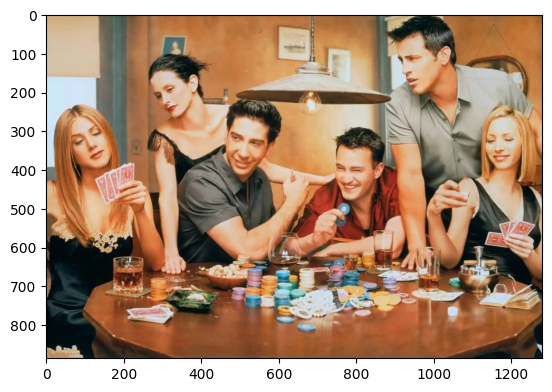

In [ ]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
faces = app.get(img)

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [ ]:
faces

[{'bbox': array([745.3323 , 342.19675, 847.2755 , 480.12787], dtype=float32),
  'kps': array([[761.0888 , 400.09268],
         [803.82446, 399.7709 ],
         [774.5848 , 428.96826],
         [767.1564 , 444.44986],
         [804.99396, 443.54013]], dtype=float32),
  'det_score': 0.8794565,
  'landmark_3d_68': array([[ 7.55727356e+02,  3.80778625e+02,  7.96677170e+01],
         [ 7.57496826e+02,  3.94982544e+02,  8.12183762e+01],
         [ 7.58772095e+02,  4.09732056e+02,  8.14447098e+01],
         [ 7.59636841e+02,  4.24490967e+02,  7.87622986e+01],
         [ 7.59842224e+02,  4.39248596e+02,  7.00580292e+01],
         [ 7.63035400e+02,  4.50863495e+02,  6.15697365e+01],
         [ 7.66239380e+02,  4.60827454e+02,  5.33282318e+01],
         [ 7.69512756e+02,  4.70610199e+02,  4.15198174e+01],
         [ 7.81719543e+02,  4.78632782e+02,  3.02058239e+01],
         [ 7.99610596e+02,  4.74984863e+02,  2.74031868e+01],
         [ 8.14424683e+02,  4.65895569e+02,  3.28499680e+01],
       

In [ ]:
len(faces)

6

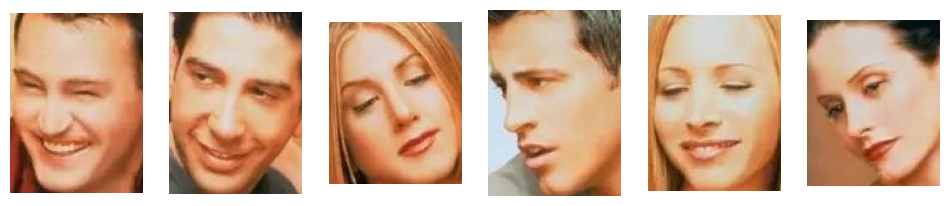

In [ ]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1,6,figsize=(12,5))

for i, face in enumerate(faces):
  bbox = face['bbox']
  bbox = [int(b) for b in bbox]
  axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
  axs[i].axis('off')

# 2. Swap the Face(s)

In [ ]:
swapper = insightface.model_zoo.get('inswapper.py', download=True, download_zip=True)

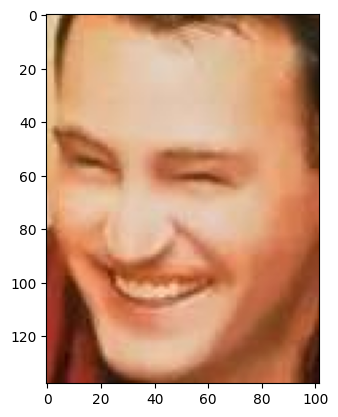

In [ ]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [ ]:
res = img.copy()
for face in faces:
  res = swapper.get(res, face, source_face, paste_back=True)

AttributeError: 'NoneType' object has no attribute 'get'